## Этап 1: Загрузка данных и необходимых библиотек 

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [252]:
#сохранение файла в переменную df

In [62]:
 df = pd.read_csv("https://raw.githubusercontent.com/aleksandra20050404/Superstore_Sales/main/train.csv")

In [64]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


---
## Этап 2: Подгатовка данных

### На начальной фазе подготовки данных проведем: 

### Запонение пропущенных значений

In [66]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [76]:
df["Postal Code"].fillna(0, inplace=True)
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### Проверка на наличие Дупликатов

In [51]:
if df.duplicated().sum() > 0:
    print("Существуют Дупликаты")
else:
    print("Дупликатов не найдено")

Дупликатов не найдено


### Приведение данных к соответствующему типу

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [89]:
df["Postal Code"]= df["Postal Code"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

---
## Этап 3: Исследовательский Анализ Данных 

### 1.Вывод первых 10 клиентов с наибольшим количеством заказов

In [104]:
# Нахождение самых лояльных клиентов по количству заказов
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Сортировка по количеству заказов в порядке убывания
repeat_customer_sorted = customer_order_frequency.sort_values(by='Total Orders', ascending=False)
print(repeat_customer_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name  Total Orders
0    WB-21850        William Brown            35
1    PP-18955           Paul Prost            34
2    MA-17560         Matt Abelman            34
3    JL-15835             John Lee            33
4    CK-12205  Chloris Kastensmidt            32
5    SV-20365          Seth Vernon            32
6    JD-15895     Jonathan Doherty            32
7    AP-10915       Arthur Prichep            31
8    ZC-21910     Zuschuss Carroll            31
9    EP-13915           Emily Phan            31


### 2. Oпределение процентного распределение клиентов по каждомому сигменту

In [112]:
#Нахождение типов клиентов
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


([<matplotlib.patches.Wedge at 0x1f896c2f010>,
 [Text(-0.07082911608159113, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.03863406331723152, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

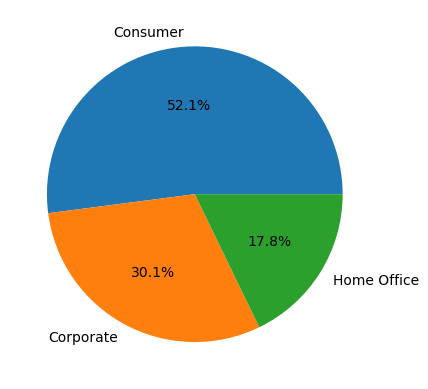

In [114]:
# Группировка по столбцу 'Segment' и подсчет количества строк в каждой группе
number_of_customers = df.groupby('Segment').size().reset_index(name='count')

# Переименование столбца 'Segment' в 'Type of Customer'
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customer'})

# Построение круговой диаграммы
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customer'], autopct='%1.1f%%')

Сегмент "Consumer" составляет 52% от общего числа клиентов.

### 3.Какой сегмент клиентов генерирует наибольший объем продаж ? 

In [133]:
# Группировка данных по сегментам и подсчет суммарных продаж
# Сохранение результата в новом DataFrame sales_per_segment
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type Of Customer', 'Sales' : 'Total Sales'})
print(sales_per_segment)

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


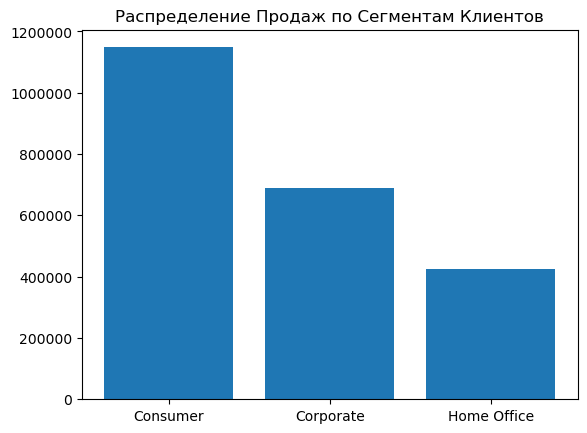

In [149]:
#Основной форматировщик для оси Y, чтобы все метки на оси Y отображались в виде целых чисел
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])
ax.set_title('Распределение Продаж по Сегментам Клиентов')

# Применение форматирования для оси Y
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()


Consumer генерирует наибольший объем продаж среди трех сегментов.

### 4. Какие штаты имеют наибольшее и наименьшее количество заказов?

In [168]:
#Серия показывающая количество заказов в каждом штате
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index' :'State', 'State':'Number of Orders'})
print(state.head(5))

  Number of Orders  count
0       California   1946
1         New York   1097
2            Texas    973
3     Pennsylvania    582
4       Washington    504


Калифорния имеет наибольшее количество заказов 

### 5. Какие категории и подкатегории наиболее популярны по количеству продаж? 

In [179]:
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x1f89b017d50>,
 [Text(0.4498857223734124, 1.003794220348251, 'Technology'),
  Text(-1.0842321085760298, -0.18558215090028554, 'Furniture'),
  Text(0.6127880326006168, -0.9135046946247543, 'Office Supplies')],
 [Text(0.24539221220367946, 0.547524120189955, '36.6%'),
  Text(-0.5913993319505617, -0.1012266277637921, '32.2%'),
  Text(0.33424801778215457, -0.4982752879771386, '31.2%')])

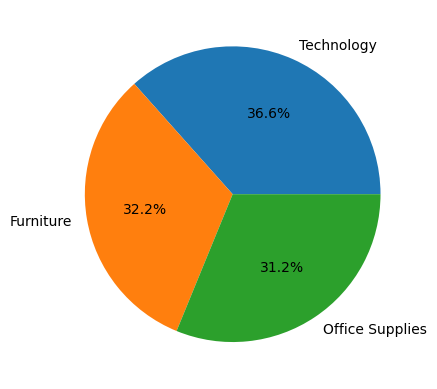

In [230]:
product_category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by = 'Sales', ascending = False)
print(product_category_sales.reset_index(drop=True))
plt.pie(product_category_sales['Sales'], labels = product_category_sales['Category'],  autopct='%1.1f%%')

**Технологии это самая продаваемая категория**

In [177]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [181]:
# группировка и подсчет уникальных подкатегорий
subcategory_count = df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


<BarContainer object of 17 artists>

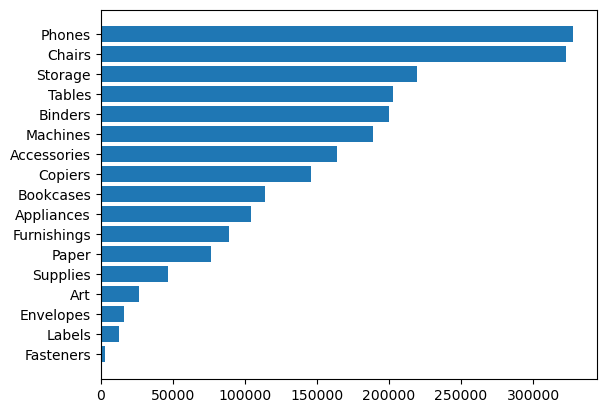

In [218]:
#Самые популярные подкатегории 
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by = 'Sales', ascending = True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])

**Телефоны это сама прадаваемая категория**

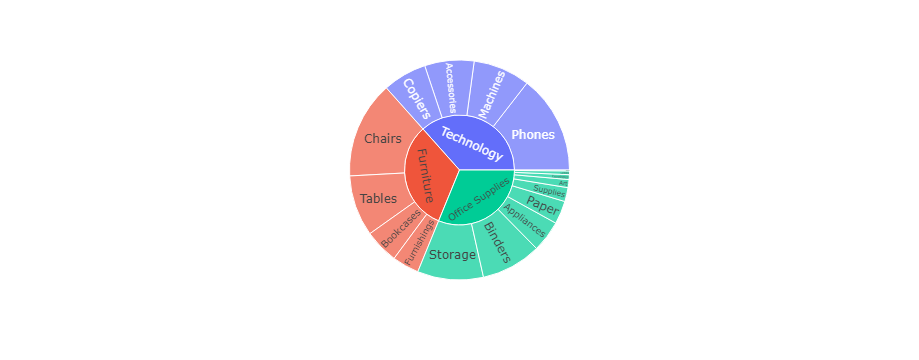

In [198]:
import plotly.express as px
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
fig = px.sunburst(df_summary, path = ['Category', 'Sub-Category'],values = 'Sales')
fig.show()

**Диаграмма помогает быстро определить,какие категории или подкатегории наиболее прибыльны и как они соотносятся друг с другом**

In [201]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### 6. Каковы годовые тенденции в прадажах? 

In [238]:
#  Преобразование столбца Order Date в DataFrame df в формат даты и времени
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index().rename(columns={'Order Date':'Year', 'Sales':'Total Sales'})
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


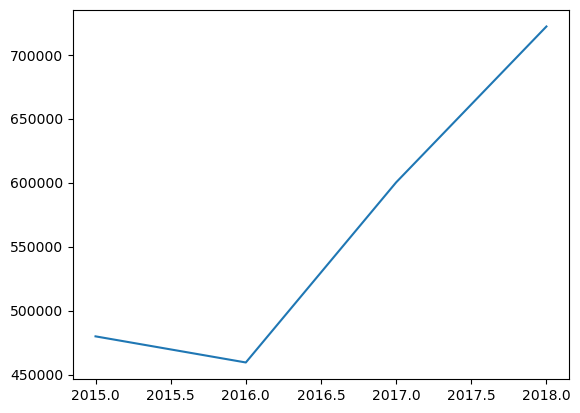

In [240]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'])

**Восходящий тренд в продажах в Сентябре и Декабре 2016 года**

### 7. Как изменялись продажи по месяцам в течение 2016 года ?

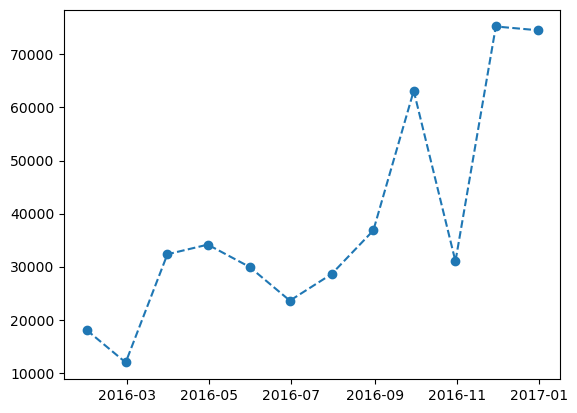

In [247]:
df['Order Date']= pd.to_datetime(df['Order Date'], dayfirst = True)
yearly_sales = df[df['Order Date'].dt.year == 2016]
monthly_sales = yearly_sales.resample('M', on = 'Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns = {'Order Date': 'Month', 'Sales': 'Total Monthly Sales'})
plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker = 'o', linestyle = '--')

**Восходящий тренд в продажах в Сентябре и Декабре 2016 года**